In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [71]:


ds = pd.read_csv('Diwali Sales Data.csv', encoding='latin1')
print(ds)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

# Data Cleaning

In [72]:
ds.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [73]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [74]:
ds = ds.drop(['Status','unnamed1'],axis=1)

In [75]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [76]:
pd.isnull(ds)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
pd.isnull(ds).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [78]:
ds = ds.dropna()

In [79]:
ds.shape

(11239, 13)

In [80]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [81]:
ds['Amount'] = ds['Amount'].astype('int')

In [82]:
ds['Amount'].dtypes

dtype('int64')

In [83]:
ds.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [84]:
ds.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Gender

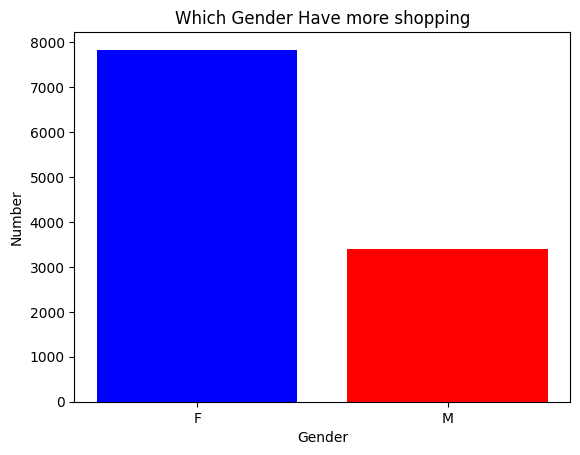

In [85]:
gender_values = ds["Gender"].value_counts()
plt.bar(gender_values.index,gender_values.values,color=['blue','red'])
plt.title("Which Gender Have more shopping")
plt.xlabel("Gender")
plt.ylabel("Number")
plt.show()

The number of Female For shopping is more than male

[74335853 31913276]


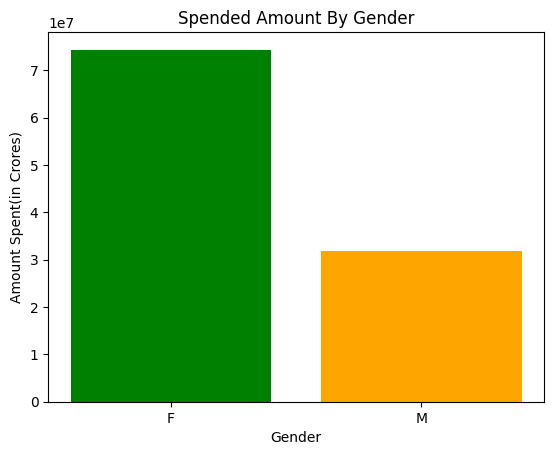

In [86]:
gender_amounts = ds.groupby(['Gender']).Amount.sum()

print(gender_amounts.values)
plt.bar(gender_amounts.index, gender_amounts.values, color=['Green', 'Orange'])
plt.title('Spended Amount By Gender')
plt.xlabel('Gender')
plt.ylabel('Amount Spent(in Crores)')
plt.show()


Amount Spended By Females Also Greter Than Males

## Age Group

In [87]:
ds.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

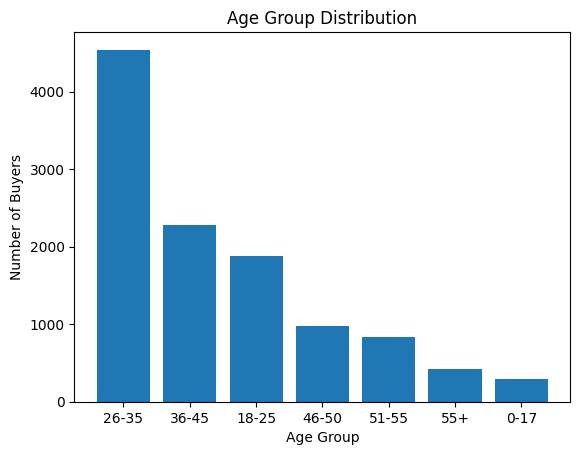

In [99]:
age_groups = ds['Age Group'].value_counts()
plt.bar(age_groups.index, age_groups.values, )
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Buyers')
plt.show()

[74335853 31913276]


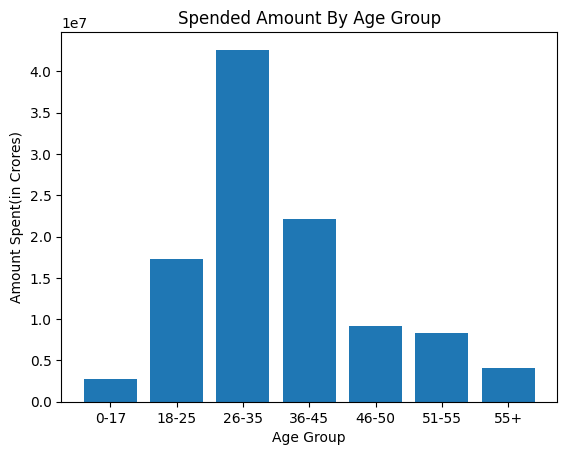

In [ ]:
age_amounts = ds.groupby(['Age Group']).Amount.sum()

plt.bar(age_amounts.index, age_amounts.values,)
plt.title('Spended Amount By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Amount Spent(in Crores)')
plt.show()


The number of buyeras and amount spent is greter in age group 26-35<Br>
The number of buyeras and amount spent is fewer in age group of 0-17

## Marital Status

In [130]:
ds['Marital_Status'] = ds['Marital_Status'].replace({0:'Y',1:'N'})


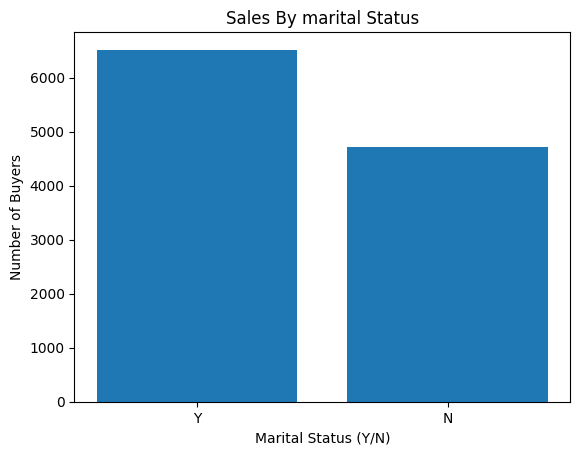

In [131]:
Marital_Status_groups = ds['Marital_Status'].value_counts()
plt.bar(Marital_Status_groups.index, Marital_Status_groups.values, )
plt.title('Sales By marital Status')
plt.xlabel('Marital Status (Y/N)')
plt.ylabel('Number of Buyers')
plt.show()


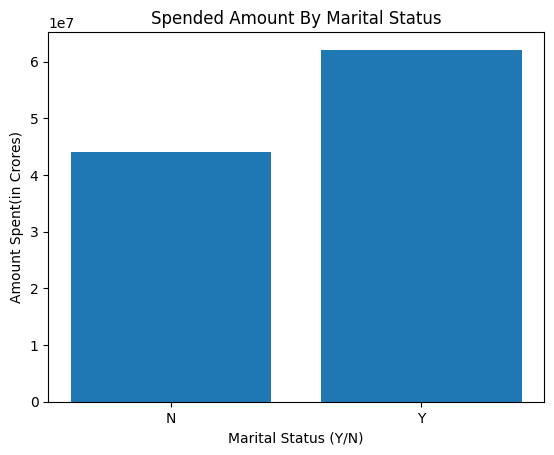

In [129]:
mrStetus_amounts = ds.groupby(['Marital_Status']).Amount.sum()


plt.bar(mrStetus_amounts.index, mrStetus_amounts.values,)
plt.title('Spended Amount By Marital Status')
plt.xlabel('Marital Status (Y/N)')
plt.ylabel('Amount Spent(in Crores)')
plt.show()


The Married Peoples spend more money and also number of them is also greter.

## States

In [89]:
ds.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

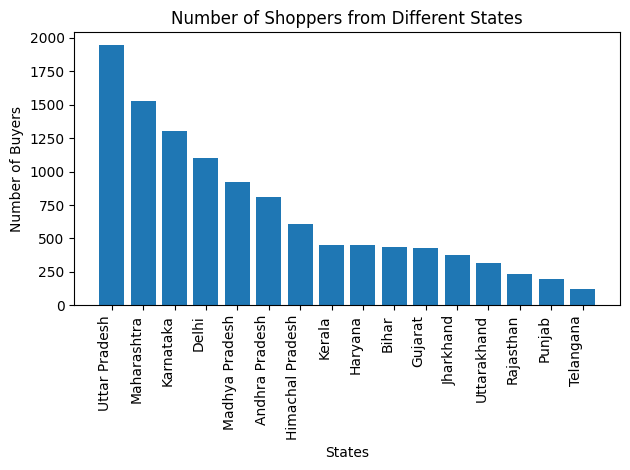

In [122]:
State_values = ds['State'].value_counts()
plt.bar(State_values.index, State_values.values)
plt.title('Number of Shoppers from Different States')
plt.xlabel('States')
plt.ylabel('Number of Buyers')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()


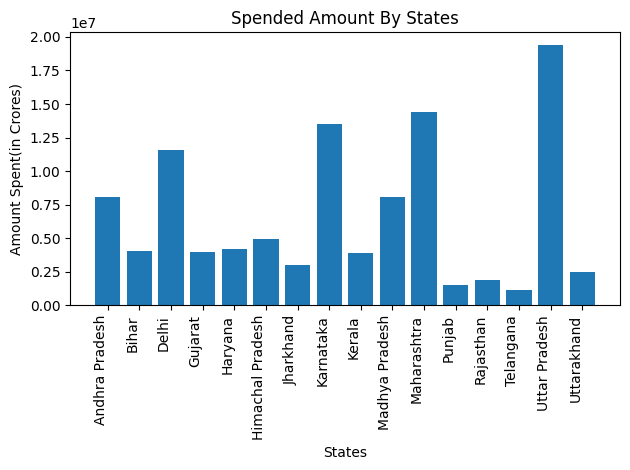

In [132]:
State_amounts = ds.groupby(['State']).Amount.sum()


plt.bar(State_amounts.index, State_amounts.values,)
plt.title('Spended Amount By States')
plt.xlabel('States')
plt.ylabel('Amount Spent(in Crores)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()


The sales are greter In states liker Utter Pradesh, Maharashtra And Karnataka.

## Zones

In [92]:
ds.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

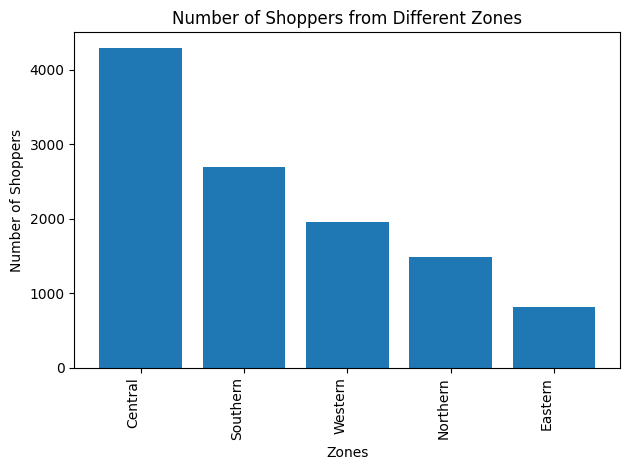

In [95]:
Zone_values = ds['Zone'].value_counts()
plt.bar(Zone_values.index, Zone_values.values)
plt.title('Number of Shoppers from Different Zones')
plt.xlabel('Zones')
plt.ylabel('Number of Shoppers')    
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

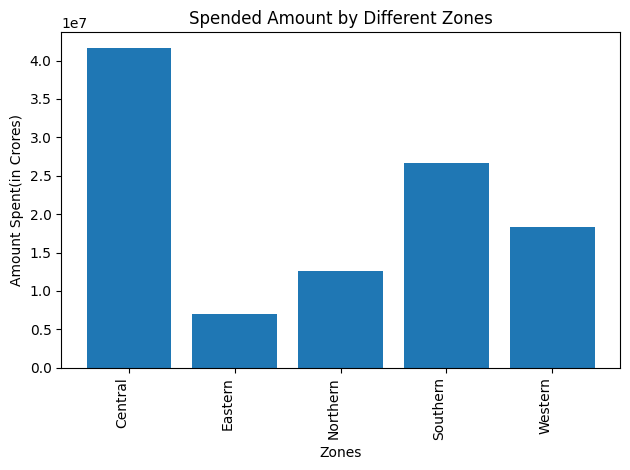

In [107]:
Zone_amounts = ds.groupby(['Zone']).Amount.sum()


plt.bar(Zone_amounts.index, Zone_amounts.values,)
plt.title('Spended Amount by Different Zones')
plt.xlabel('Zones')
plt.ylabel('Amount Spent(in Crores)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

Central Zone States Has more slales than others

## Occupation

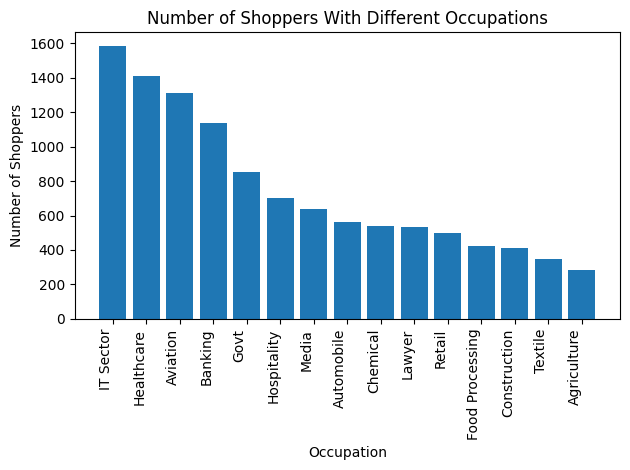

In [96]:
Occupation_values = ds['Occupation'].value_counts()
plt.bar(Occupation_values.index,Occupation_values.values)
plt.title('Number of Shoppers With Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Shoppers')    
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

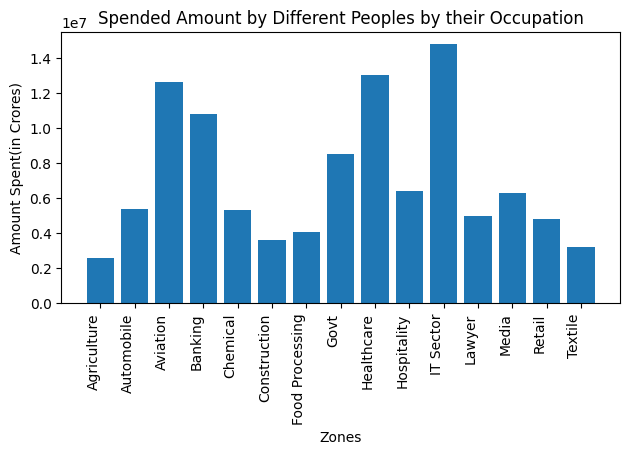

In [108]:
Occupation_amounts = ds.groupby(['Occupation']).Amount.sum()


plt.bar(Occupation_amounts.index, Occupation_amounts.values,)
plt.title('Spended Amount by Different Peoples by their Occupation')
plt.xlabel('Zones')
plt.ylabel('Amount Spent(in Crores)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

IT, Healthcare and Aviation Sector Has more sales

## Product Catogory

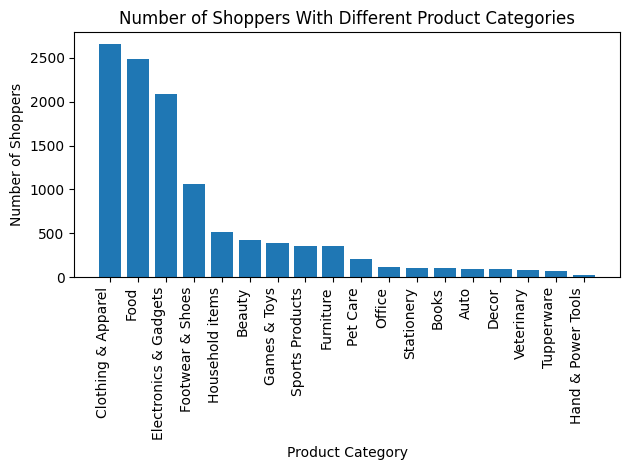

In [111]:
Product_Category_values = ds['Product_Category'].value_counts()
plt.bar(Product_Category_values.index,Product_Category_values.values)
plt.title('Number of Shoppers With Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Shoppers')    
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()


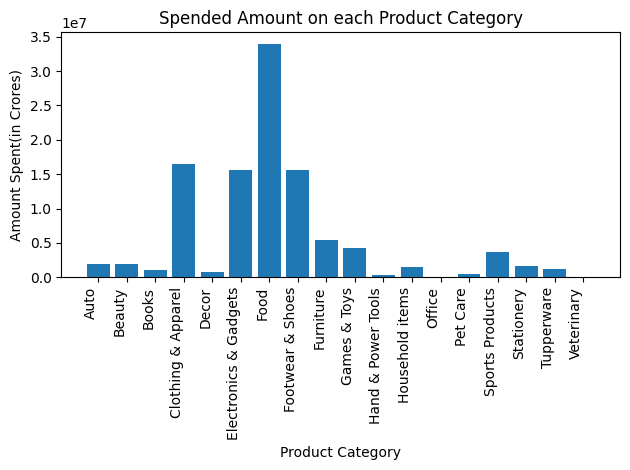

In [109]:
Product_Category_amounts = ds.groupby(['Product_Category']).Amount.sum()


plt.bar(Product_Category_amounts.index, Product_Category_amounts.values,)
plt.title('Spended Amount on each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount Spent(in Crores)')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

The Products Like Clothing and Apparel,Food & Electronics and Gadgets are selling more than every other produts

In [98]:
ds.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')